In [35]:
import pandas as pd
import matplotlib as plb
import seaborn as sns
file_path = 'student_excel/student-mat.csv'
df = pd.read_csv(file_path, sep=';')  

In [36]:
df.head()

,sex,age,address,Pstatus,Medu,Fedu,guardian,studytime,failures,schoolsup,famsup,paid,higher,internet,famrel,absences,G3
0,F,18,U,A,4,4,mother,2,0,yes,no,no,yes,no,4,6,6
1,F,17,U,T,1,1,father,2,0,no,yes,no,yes,yes,5,4,6
2,F,15,U,T,1,1,mother,2,3,yes,no,yes,yes,yes,4,10,10
3,F,15,U,T,4,2,mother,3,0,no,yes,yes,yes,yes,3,2,15
4,F,16,U,T,3,3,father,2,0,no,yes,yes,yes,no,4,4,10


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sex        392 non-null    object
 1   age        392 non-null    int64 
 2   address    392 non-null    object
 3   Pstatus    392 non-null    object
 4   Medu       392 non-null    int64 
 5   Fedu       392 non-null    int64 
 6   guardian   392 non-null    object
 7   studytime  392 non-null    int64 
 8   failures   392 non-null    int64 
 9   schoolsup  392 non-null    object
 10  famsup     392 non-null    object
 11  paid       392 non-null    object
 12  higher     392 non-null    object
 13  internet   392 non-null    object
 14  famrel     392 non-null    int64 
 15  absences   392 non-null    int64 
 16  G3         392 non-null    int64 
dtypes: int64(8), object(9)
memory usage: 52.2+ KB


In [5]:
print("\nDescripción estadística del dataset:")
df.describe()






Descripción estadística del dataset:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
# Verificar valores nulos
print("\nVerificación de valores nulos:")
df.isnull().sum()



Verificación de valores nulos:


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

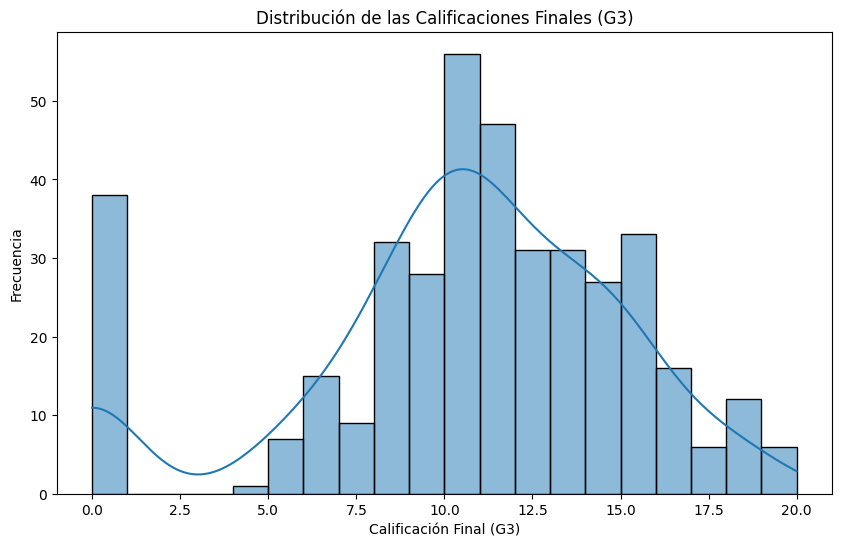

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], kde=True, bins=20)
plt.title('Distribución de las Calificaciones Finales (G3)')
plt.xlabel('Calificación Final (G3)')
plt.ylabel('Frecuencia')
plt.show()

<small>
**Important Note:** The target attribute G3 has a strong correlation with attributes G2 and G1. 
This occurs because G3 is the final year grade (issued at the 3rd period), 
while G1 and G2 correspond to the 1st and 2nd period grades. 
It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful.

</small>
Tratare de realizar el trabajo sin G1,G2 para tratar de encontrar caracteristicas externas al desempeño del alumno en los 2 anteriores trimestres


In [8]:
df.drop(['G1', 'G2'], axis=1, inplace=True)

Analisis Univarido

age


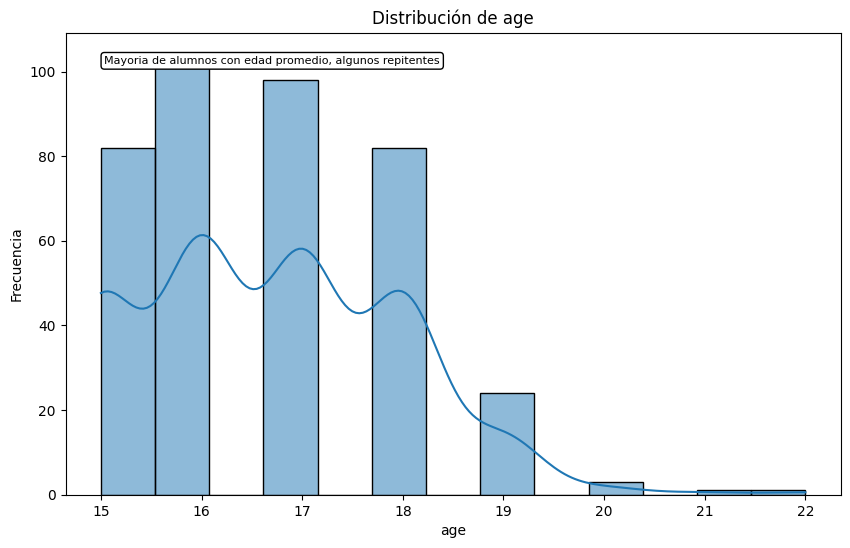

Medu


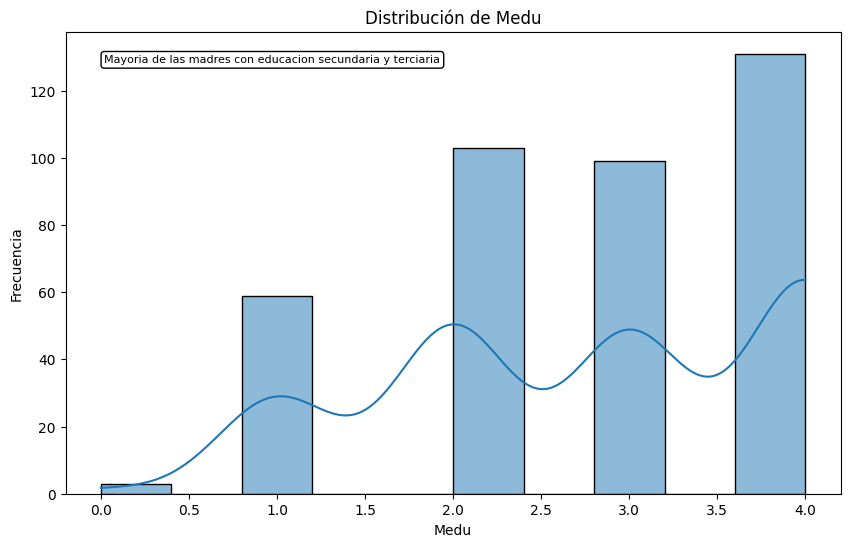

Fedu


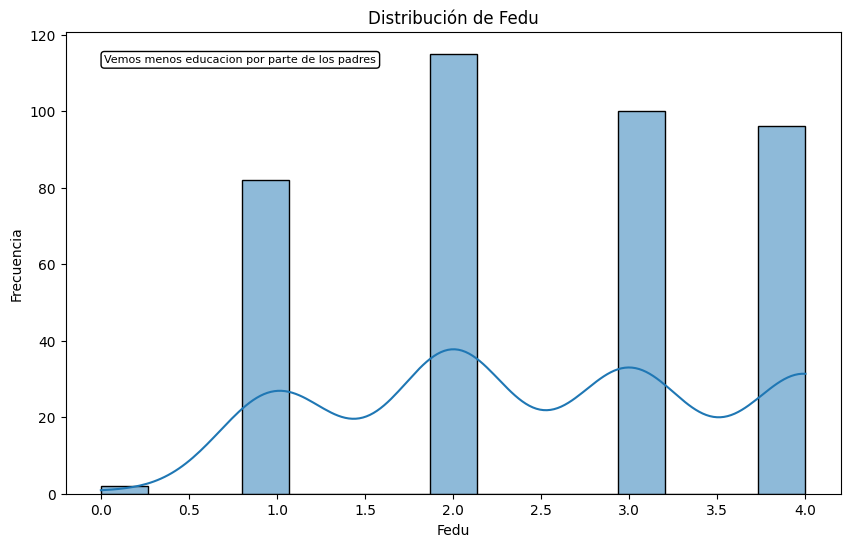

traveltime


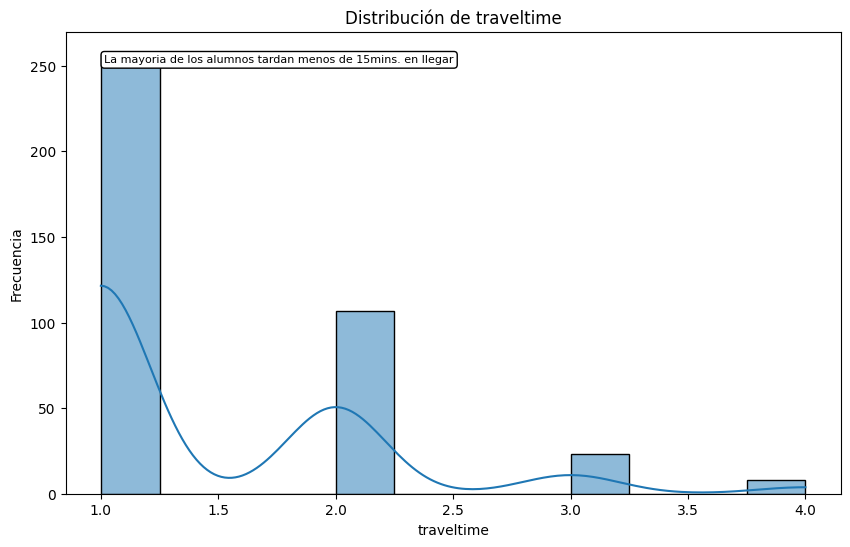

studytime


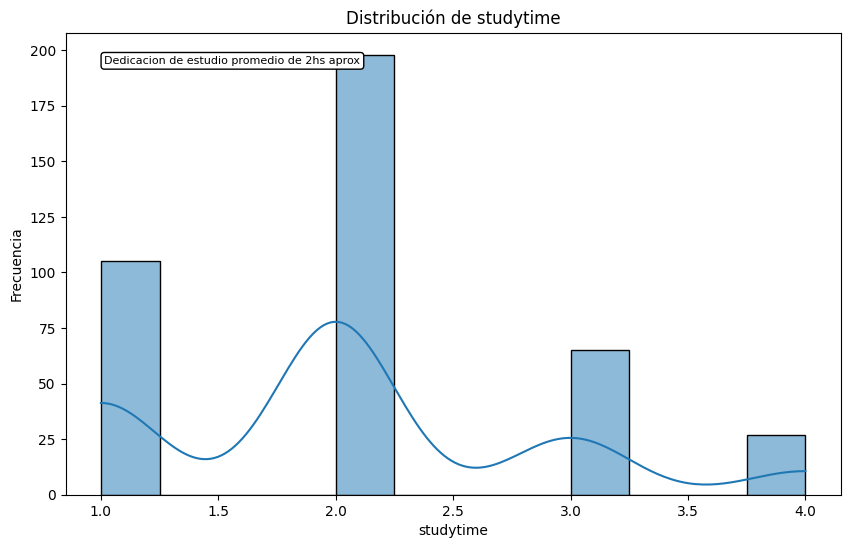

failures


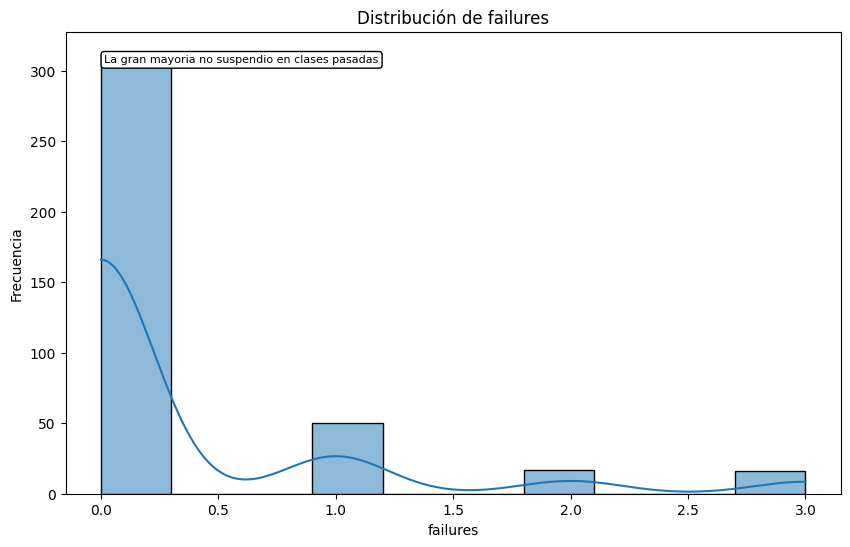

famrel


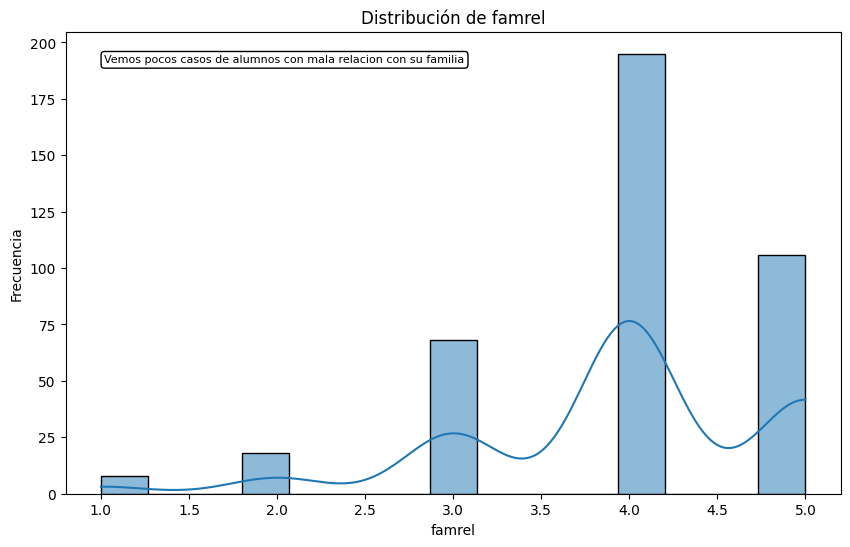

freetime


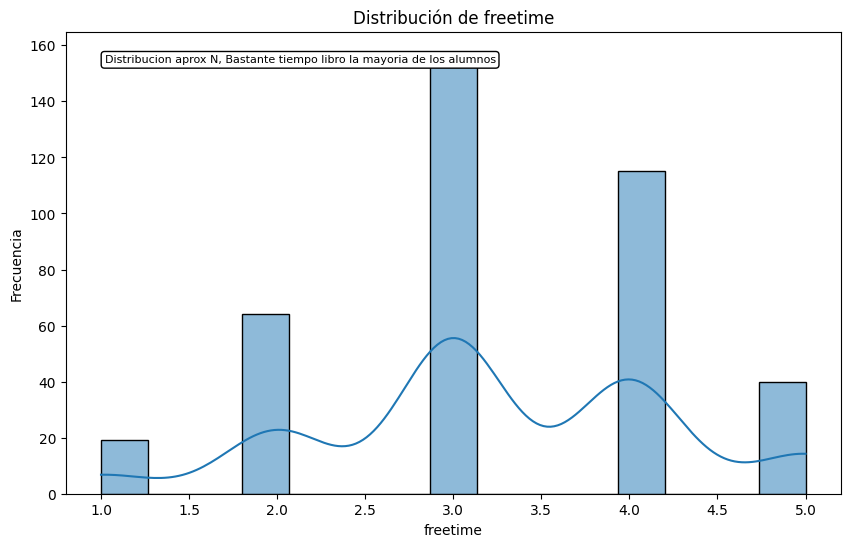

goout


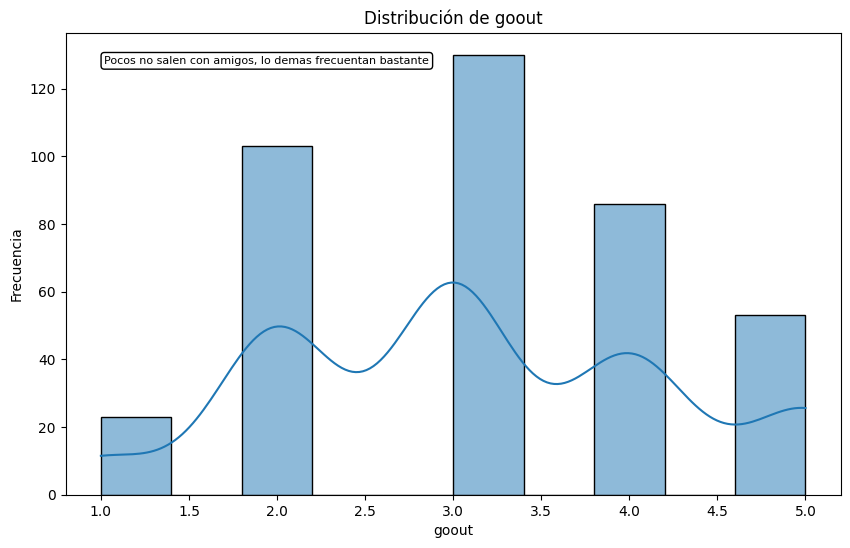

Dalc


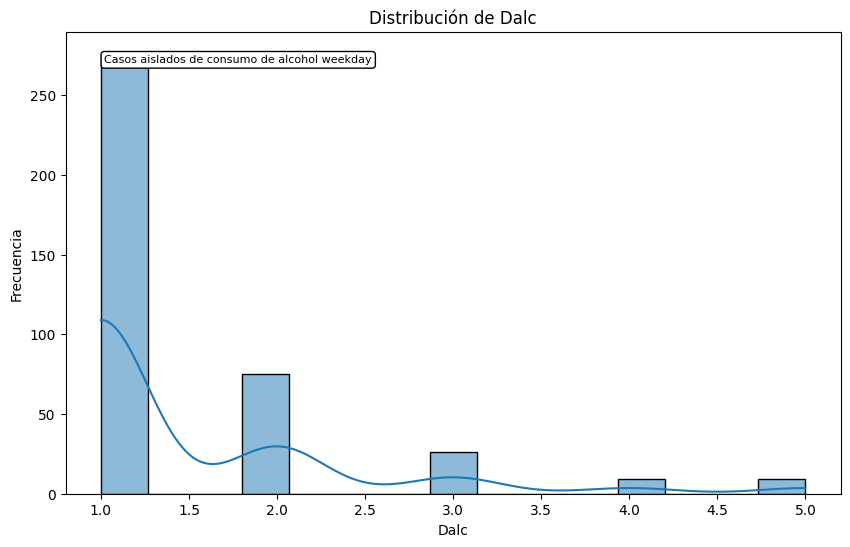

Walc


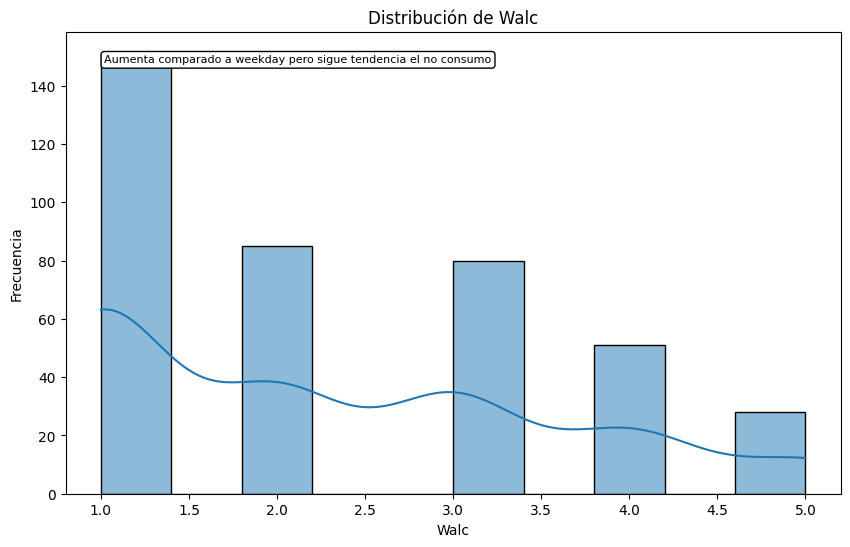

health


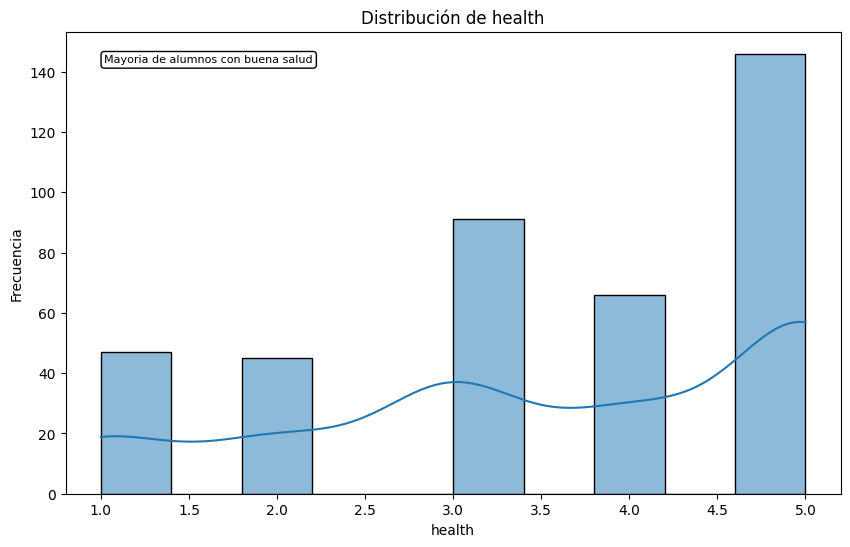

absences


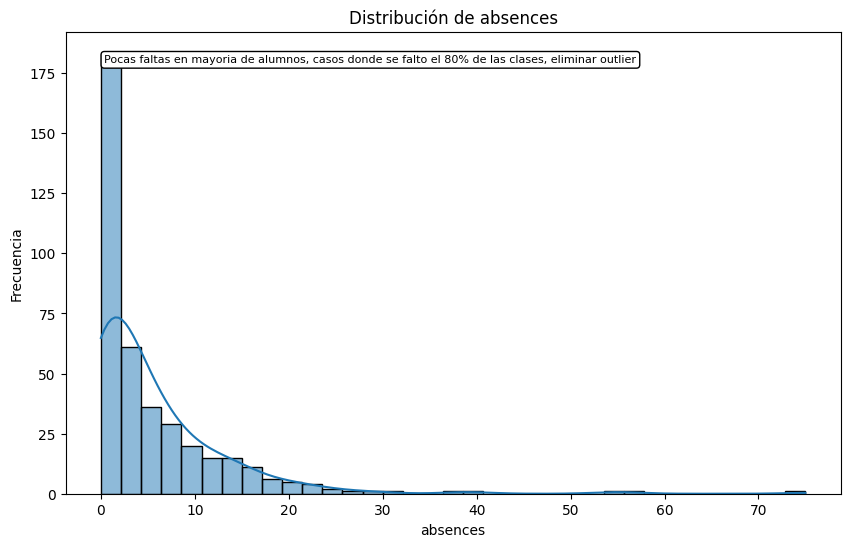

G3


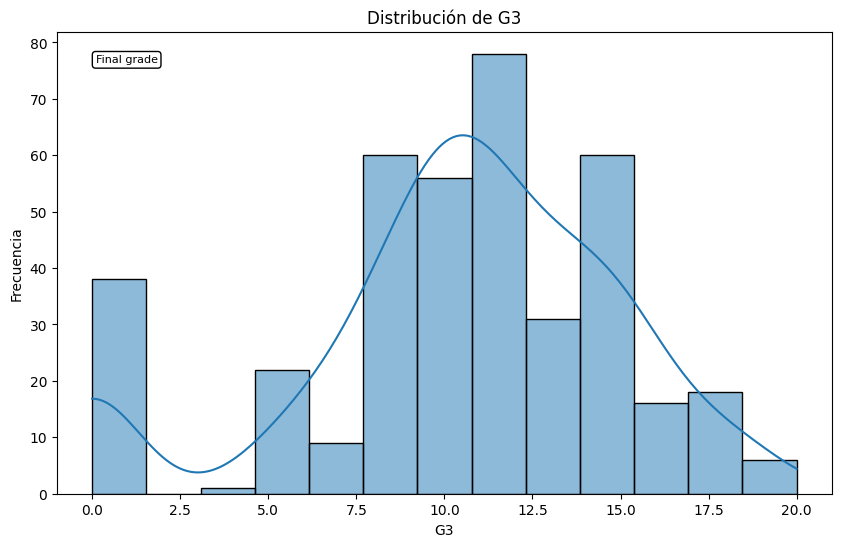

In [9]:

# Selecciona las características numéricas
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Comentarios para cada característica
comments = {
'age':'Mayoria de alumnos con edad promedio, algunos repitentes',
'Medu':'Mayoria de las madres con educacion secundaria y terciaria',
'Fedu':'Vemos menos educacion por parte de los padres',
'traveltime':'La mayoria de los alumnos tardan menos de 15mins. en llegar',
'studytime':'Dedicacion de estudio promedio de 2hs aprox',
'failures':'La gran mayoria no suspendio en clases pasadas',
'famrel':'Vemos pocos casos de alumnos con mala relacion con su familia',
'freetime':'Distribucion aprox N, Bastante tiempo libro la mayoria de los alumnos',
'goout':'Pocos no salen con amigos, lo demas frecuentan bastante',
'Dalc':'Casos aislados de consumo de alcohol weekday',
'Walc':'Aumenta comparado a weekday pero sigue tendencia el no consumo',
'health':'Mayoria de alumnos con buena salud',
'absences':'Pocas faltas en mayoria de alumnos, casos donde se falto el 80% de las clases, eliminar outlier',
'G3':'Final grade',

}

for feature in numerical_features:
    print(feature)
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    if feature in comments:
        plt.text(0.05, 0.95, comments[feature], transform=plt.gca().transAxes,
                 fontsize=8, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
    
    plt.show()


In [10]:
# borrar datos con ausencias > a 40.
num_absences_greater_than_40 = df[df['absences'] > 40]
#print(num_absences_greater_than_40)
#llama la atencion que 2 de los 3 datos no parecen tener algun dato alarmante que pueda estar vinculado a su cantidad de faltas
df = df.drop(num_absences_greater_than_40.index) 

Analisis Bivariado

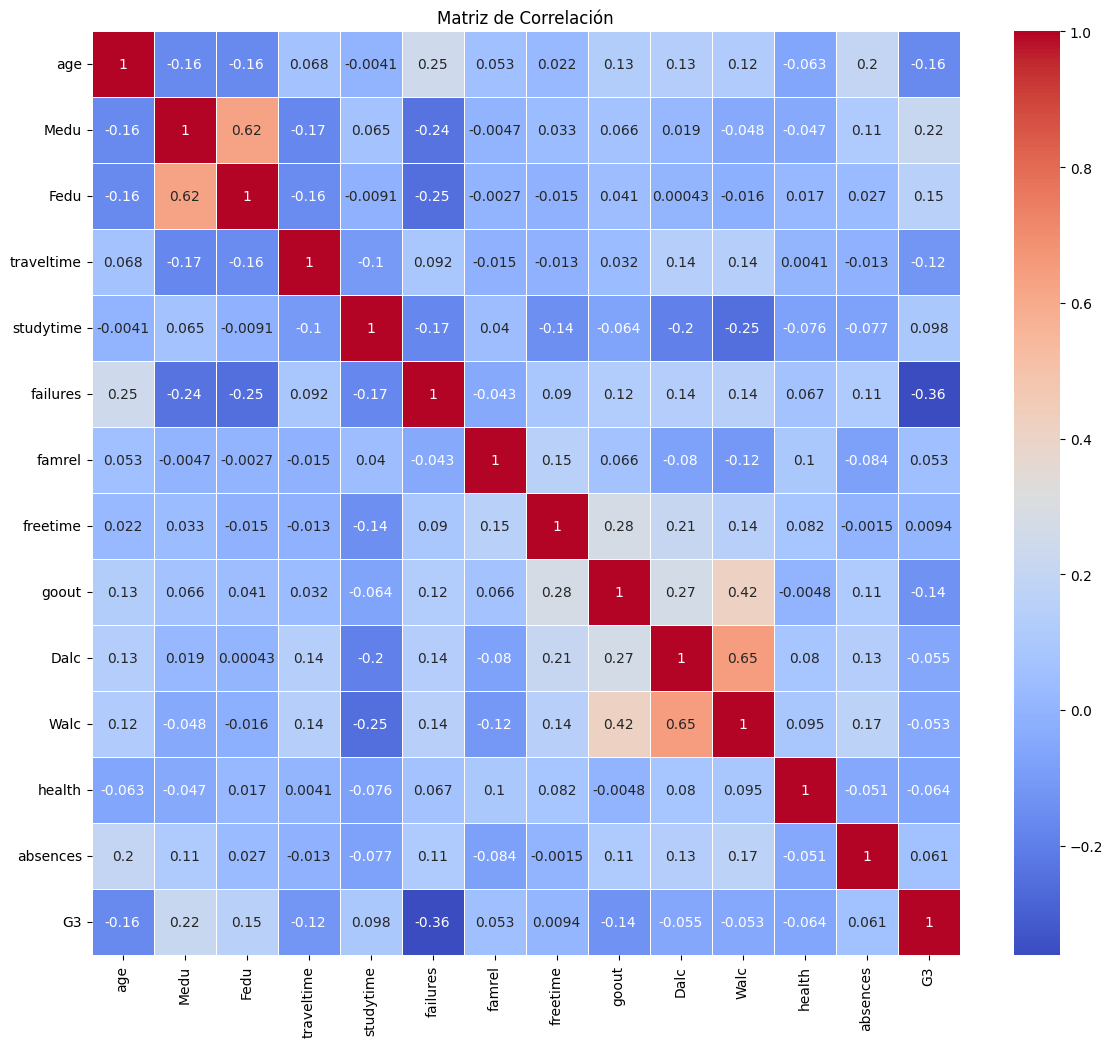

In [11]:
#matriz de correlacion de variables numericas
numerical_features = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


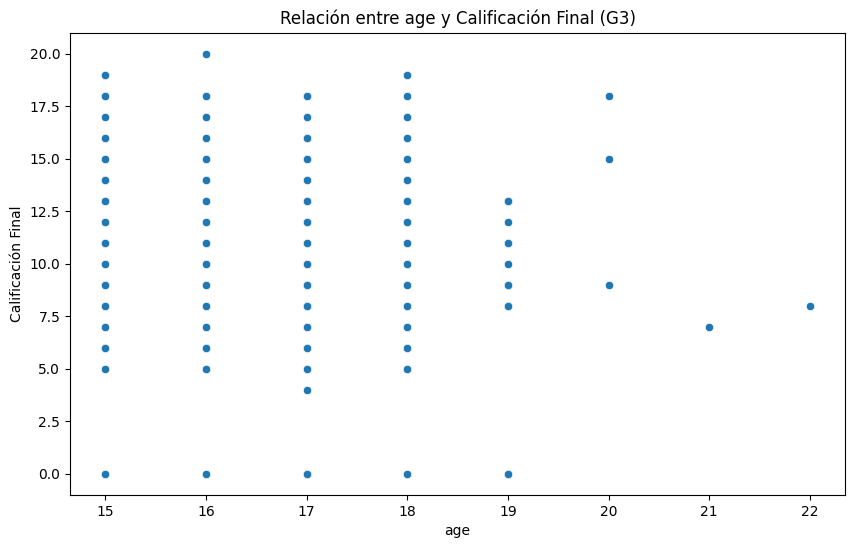

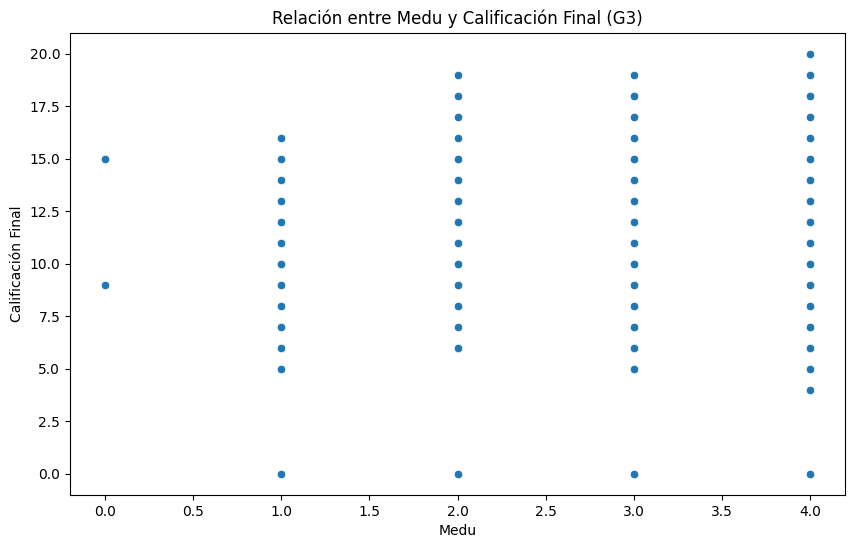

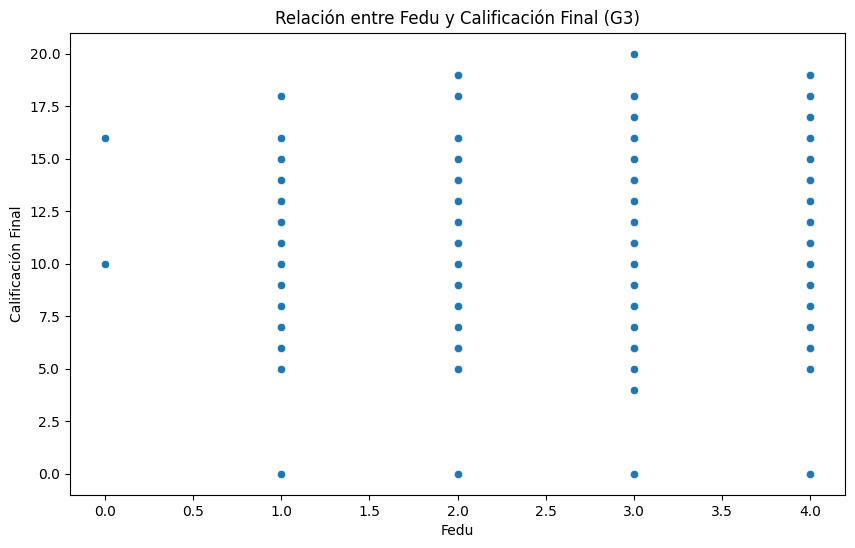

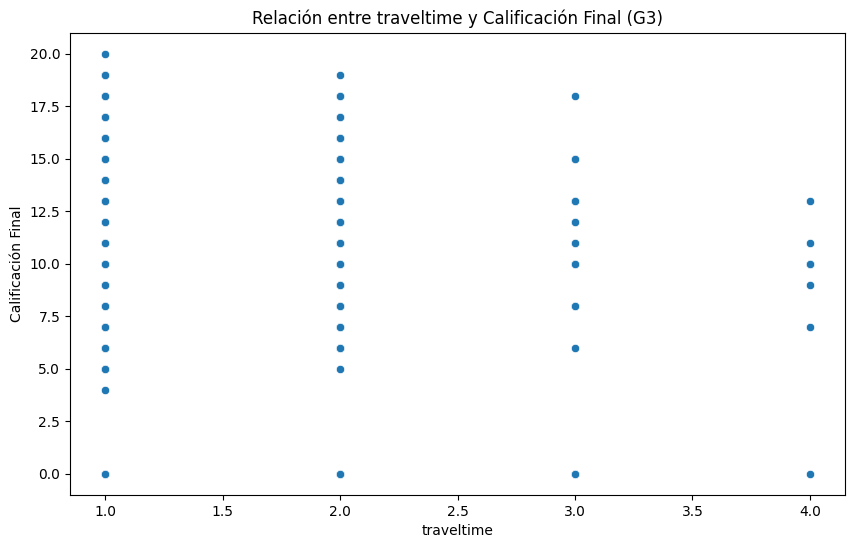

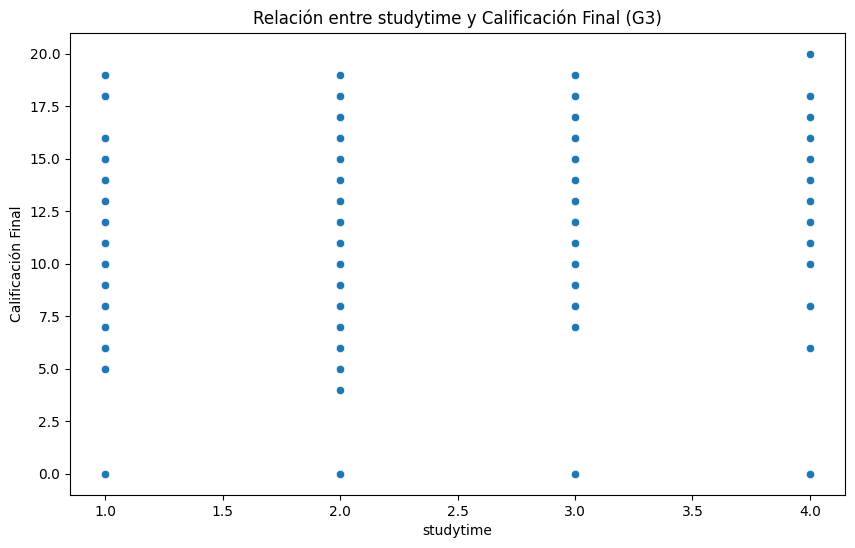

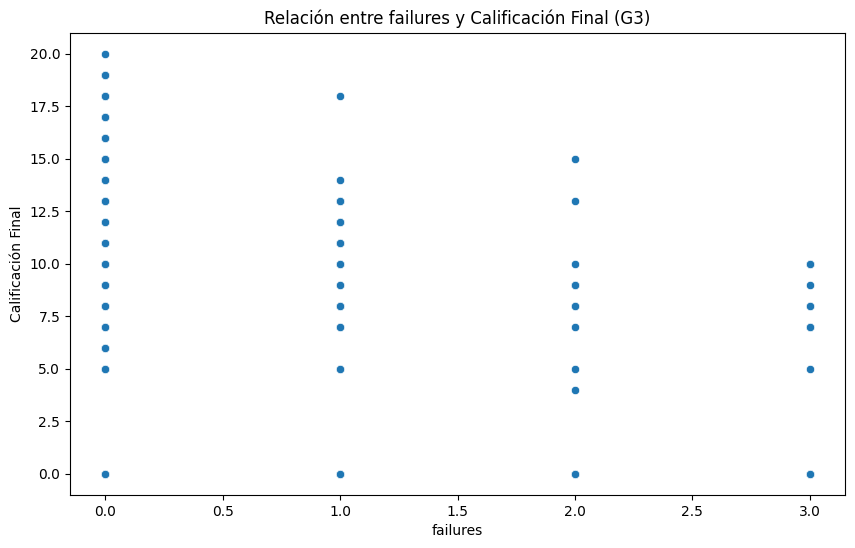

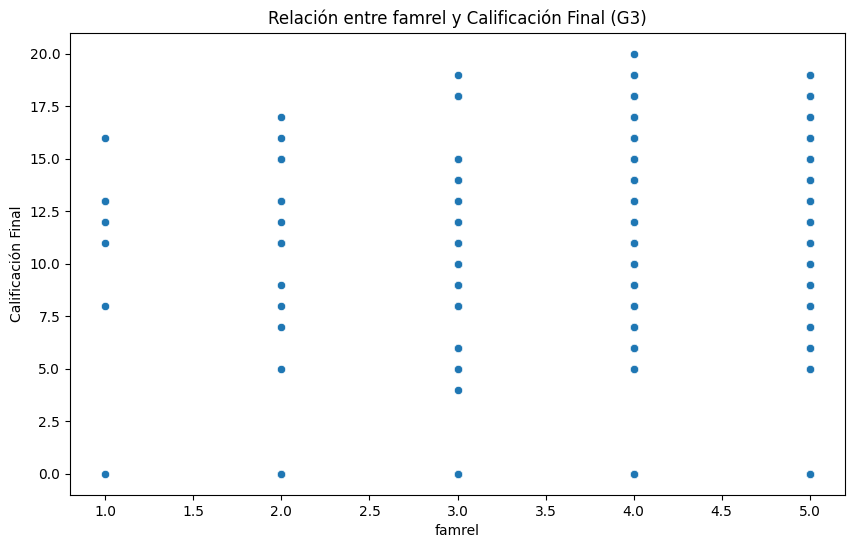

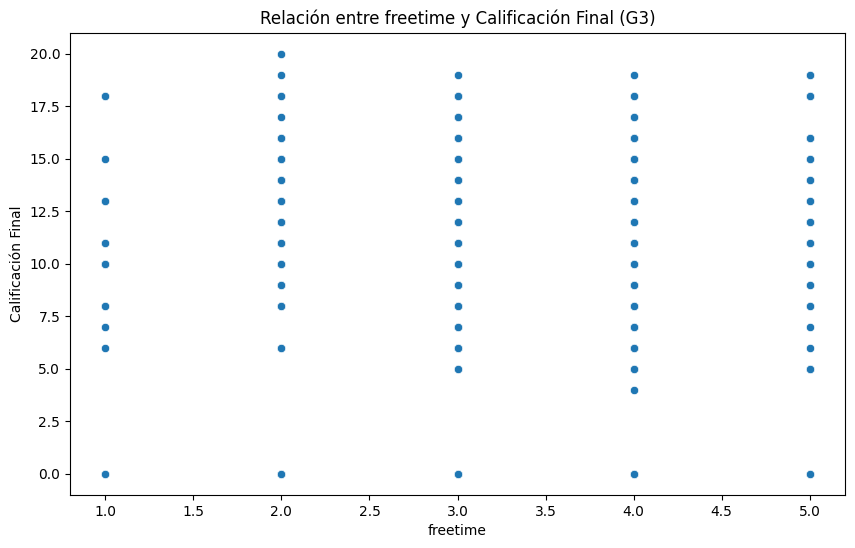

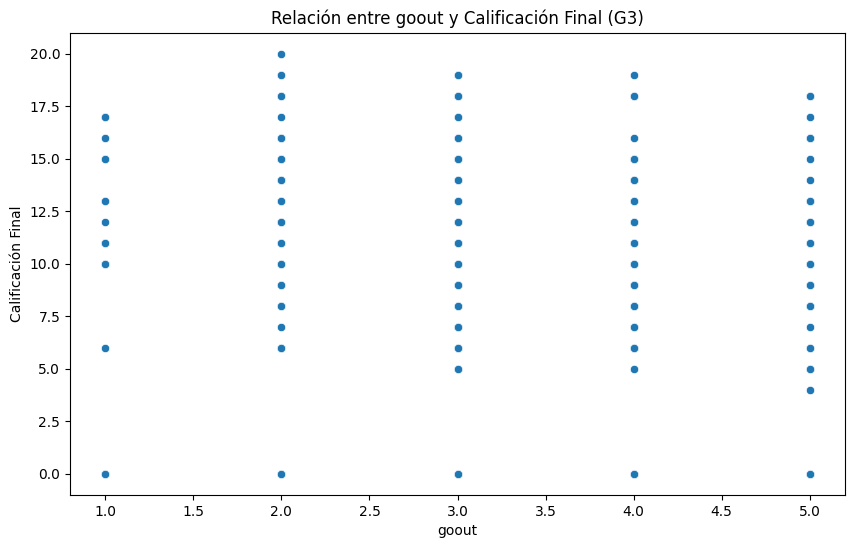

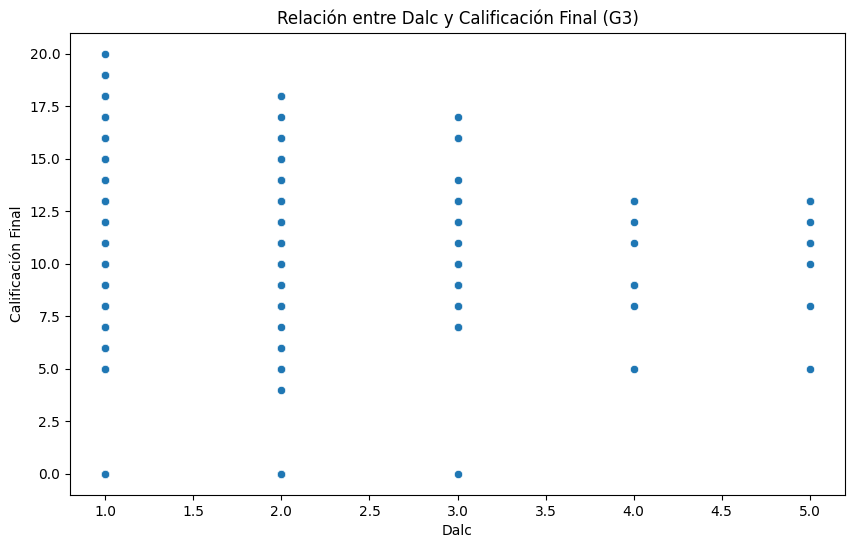

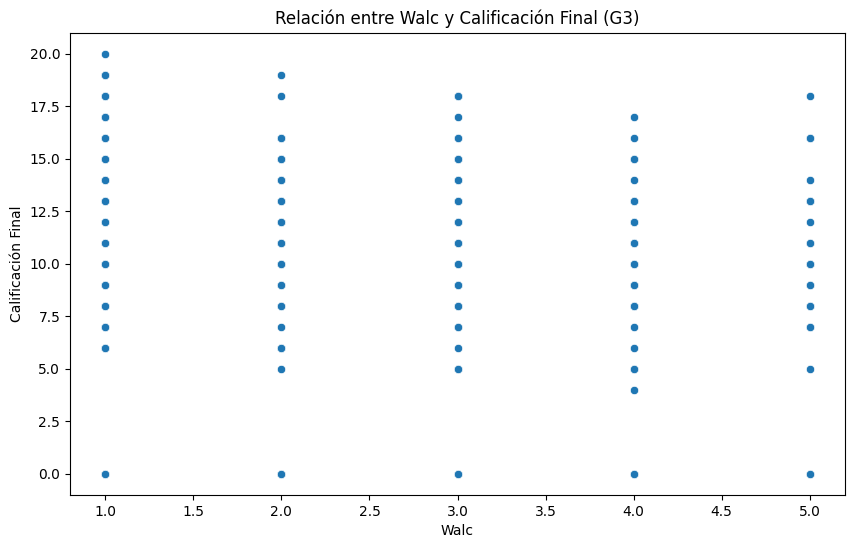

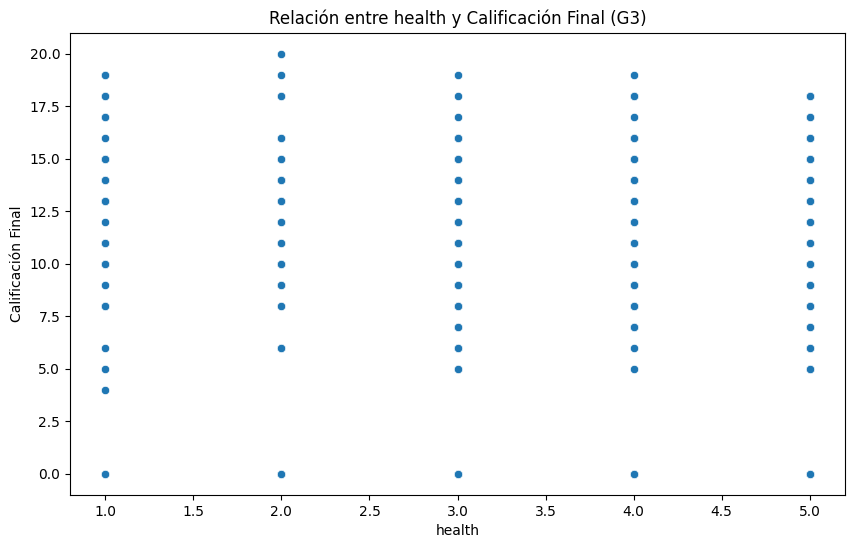

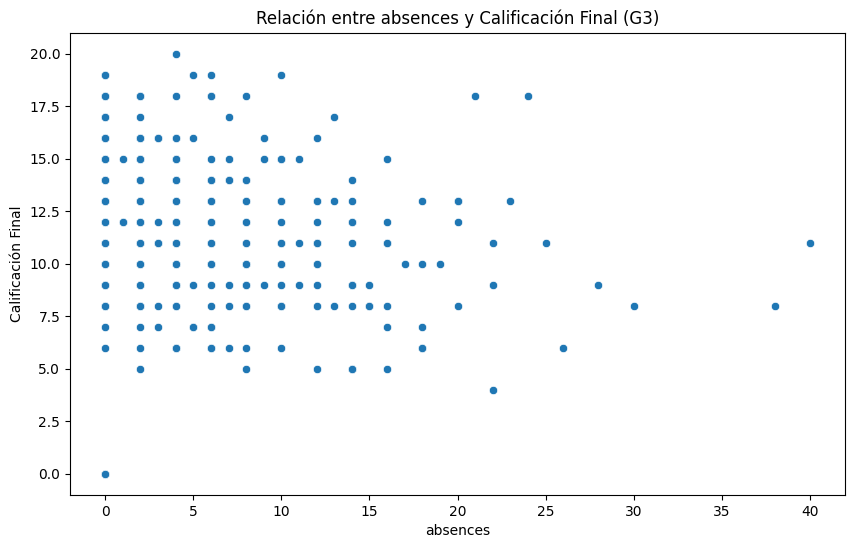

In [12]:
# Relación entre cada característica y la calificación final
for feature in numerical_features:
    if feature != 'G3':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=feature, y='G3')
        plt.title(f'Relación entre {feature} y Calificación Final (G3)')
        plt.xlabel(feature)
        plt.ylabel('Calificación Final')
        plt.show()

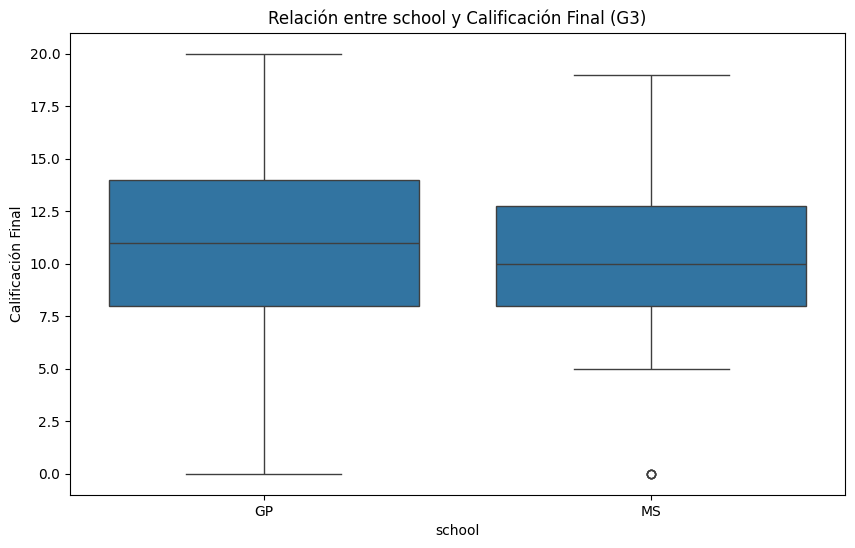

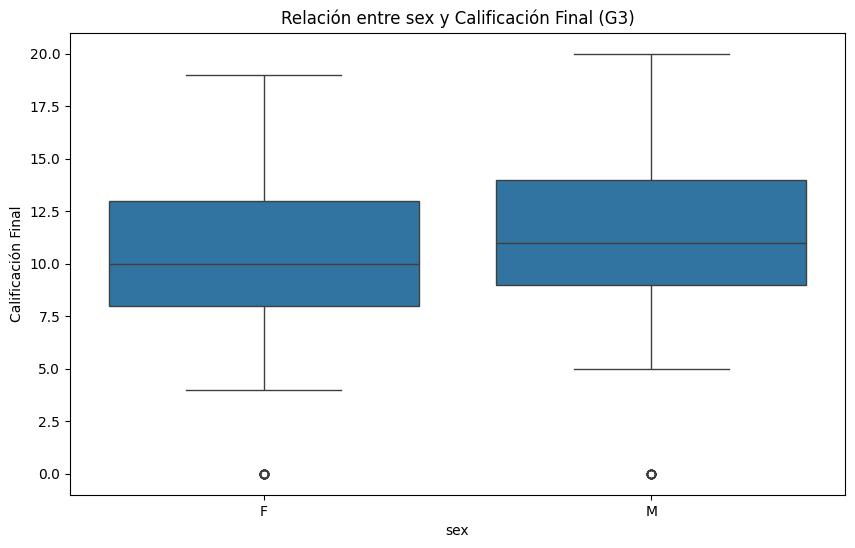

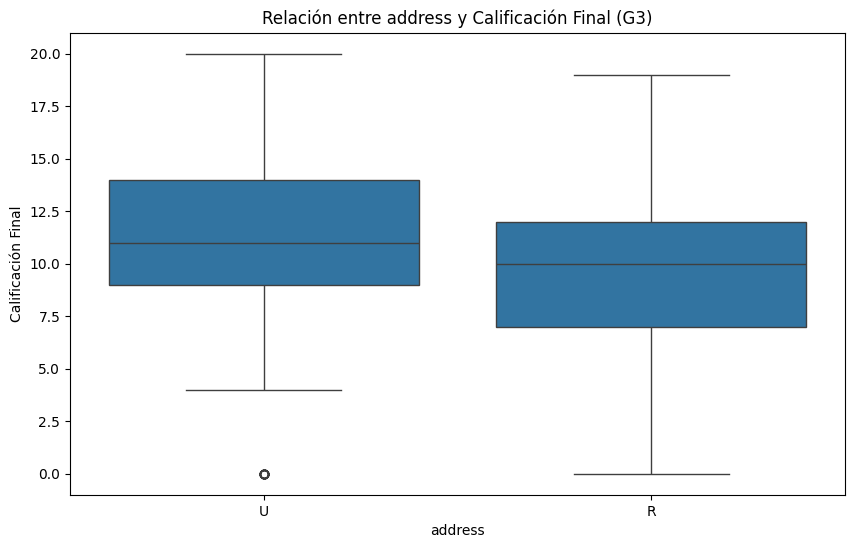

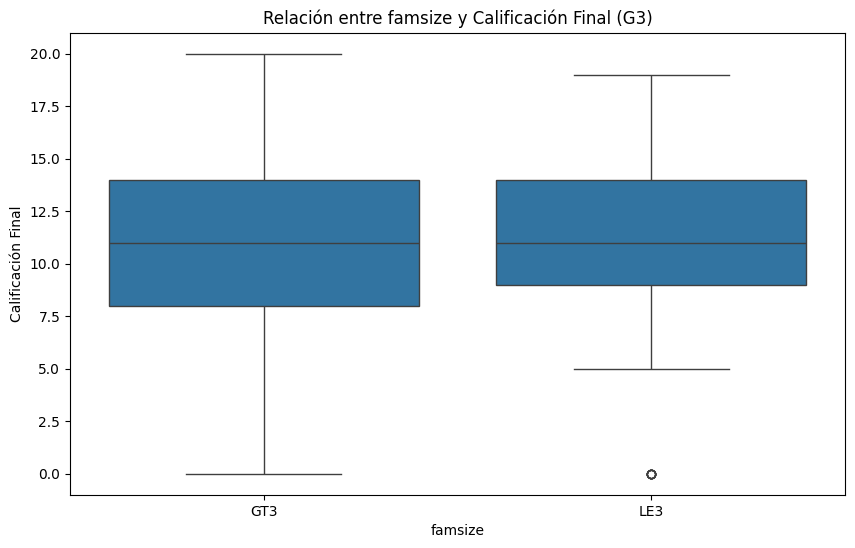

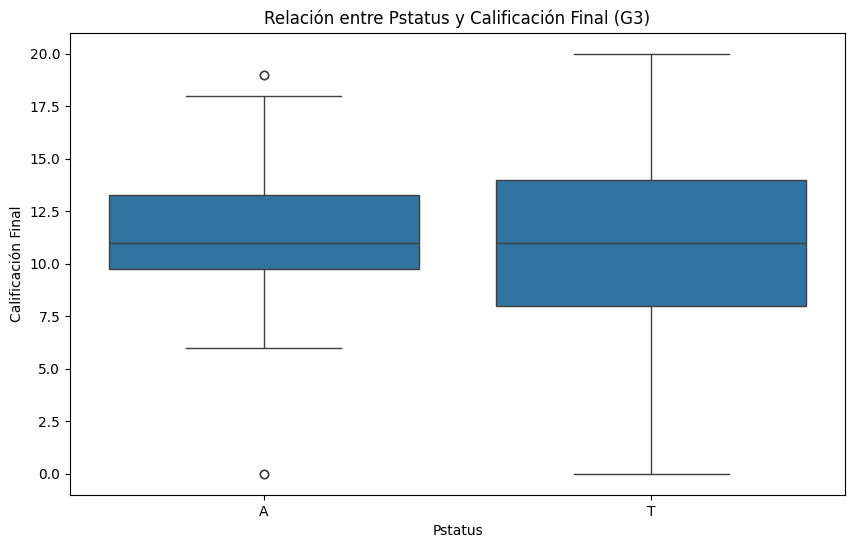

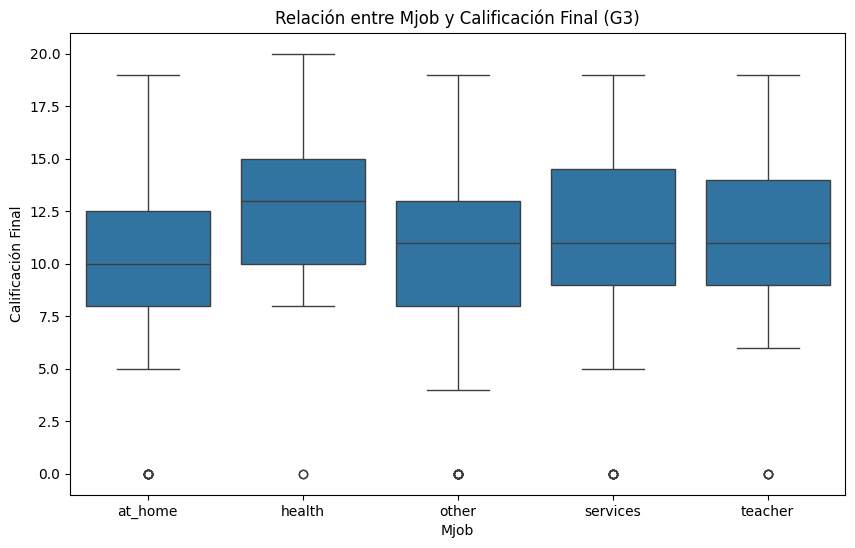

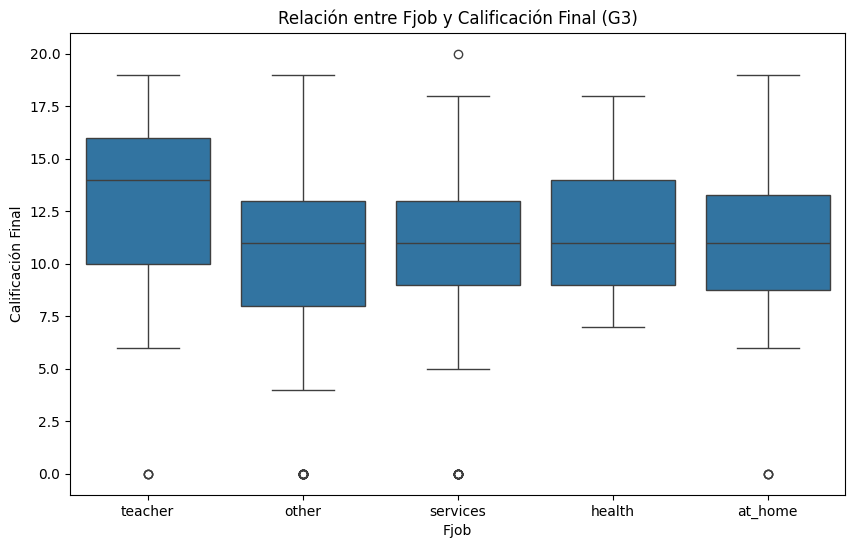

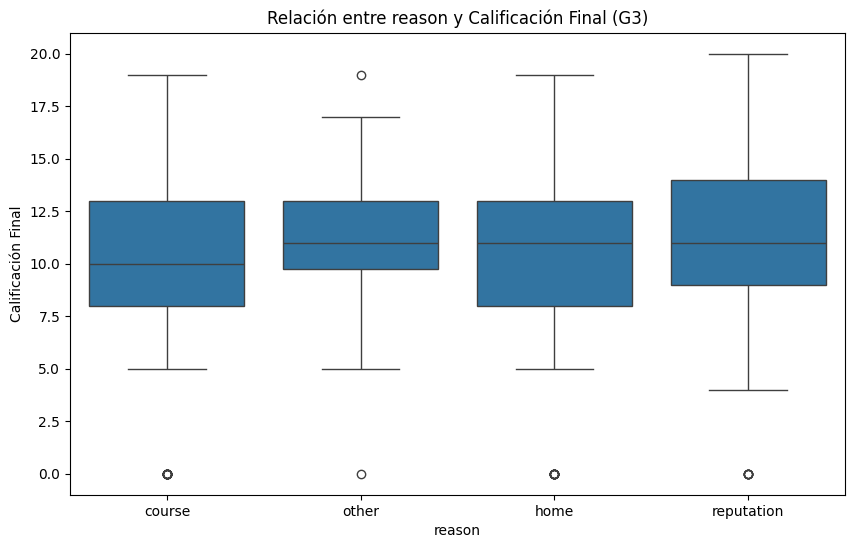

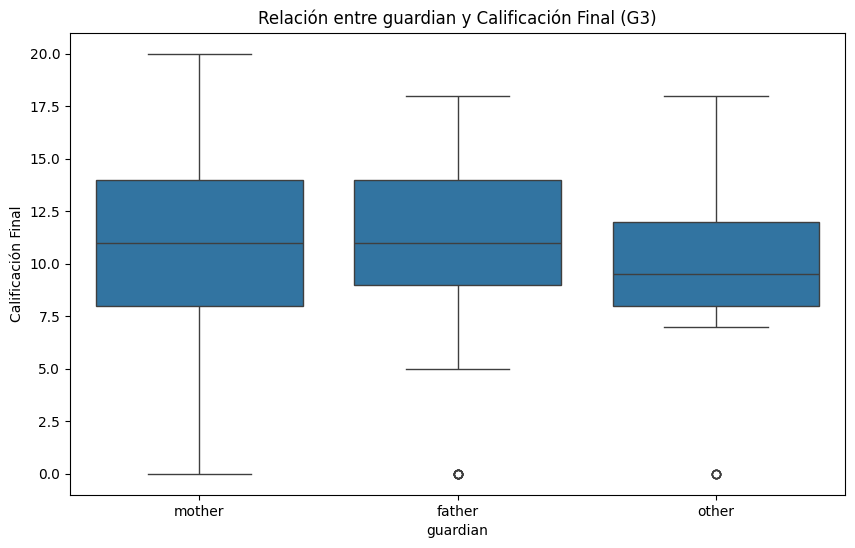

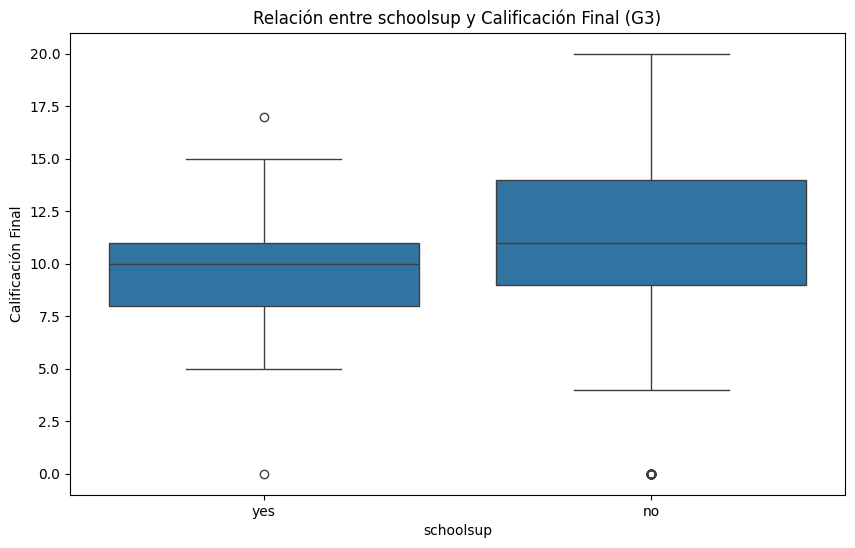

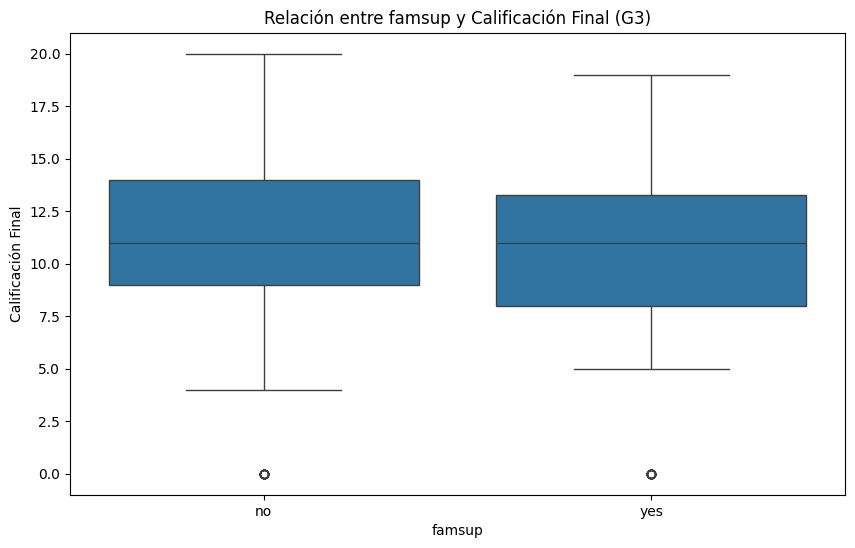

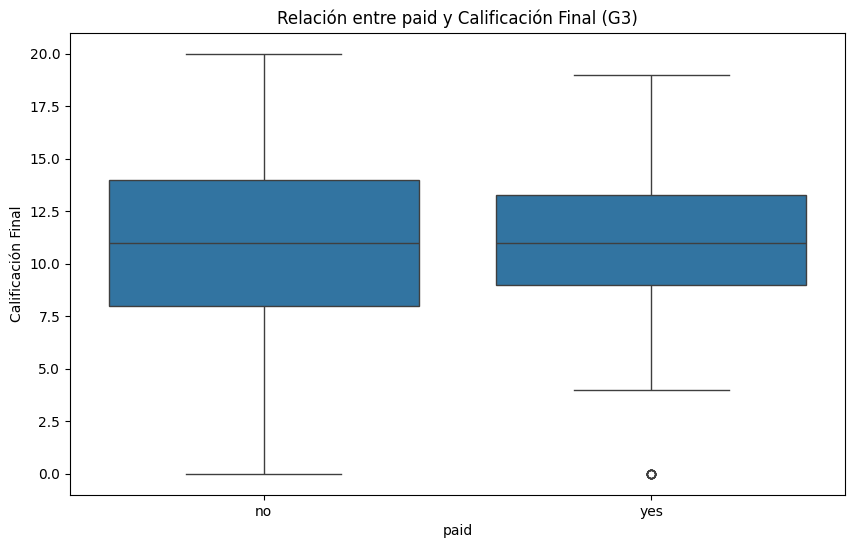

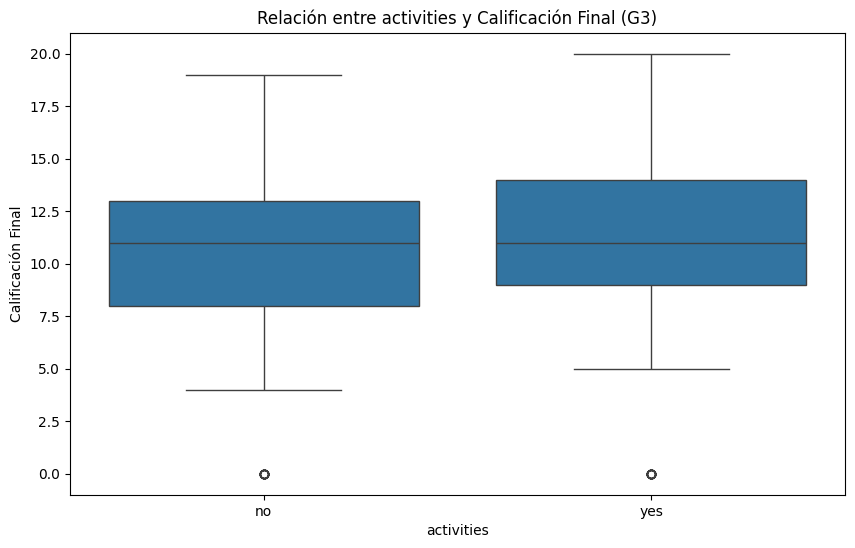

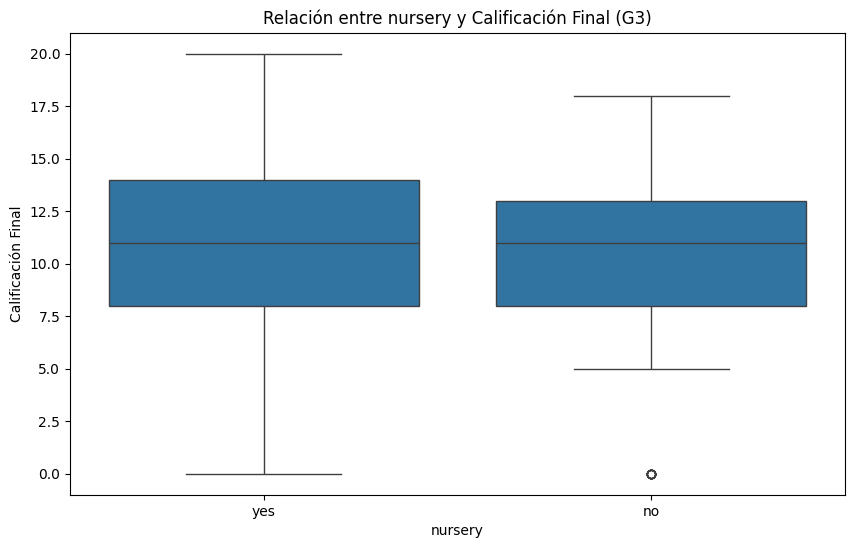

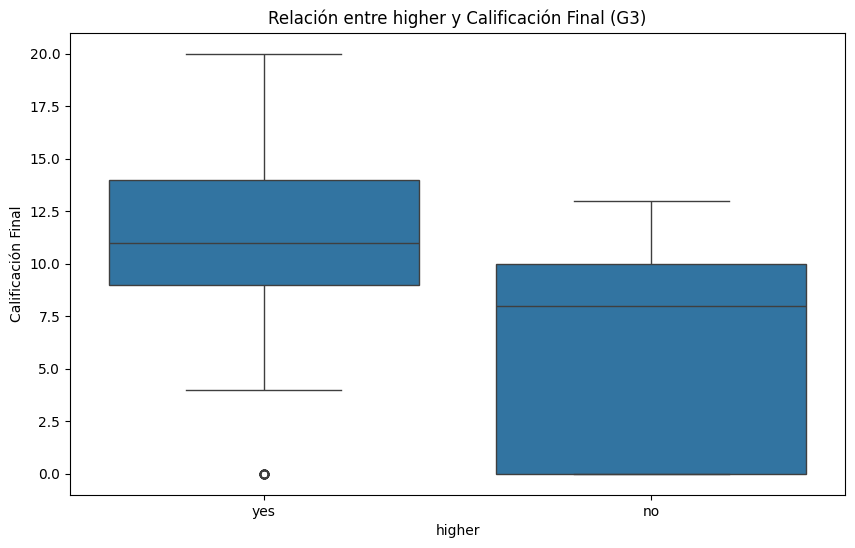

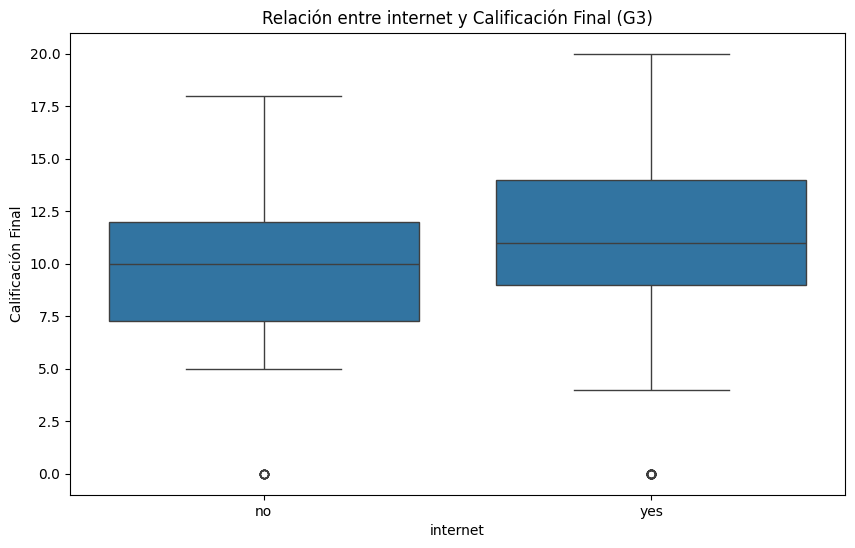

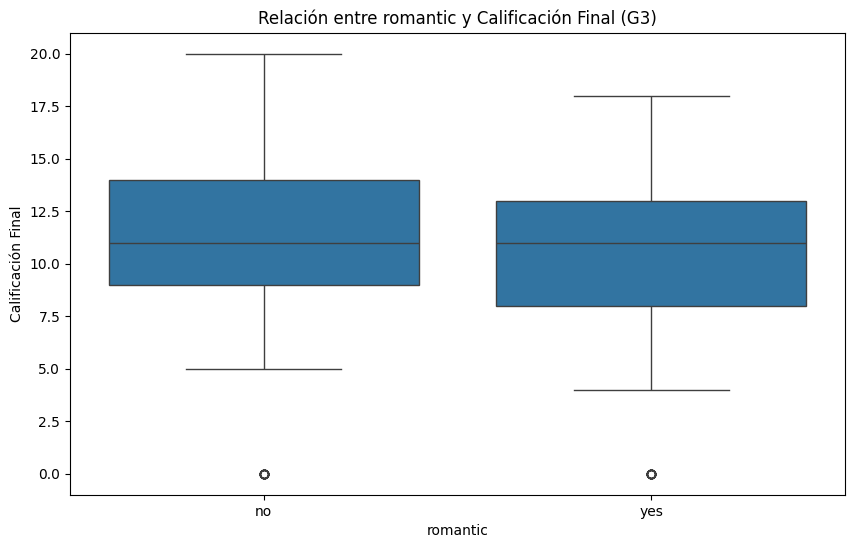

In [13]:
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature, y='G3')
    plt.title(f'Relación entre {feature} y Calificación Final (G3)')
    plt.xlabel(feature)
    plt.ylabel('Calificación Final')
    plt.show()

<small>
Luego de ver los graficos y la matriz de correlacion es dificil encontrar correlaciones, podemos ver que los alumnos que quieren realizar una educacion posterior, tienen mejores notas comparado a quienes no quieren seguir estudiando.
</small>


In [14]:
# Filtrar los datos
final_grade_0 = df[df['G3'] == 0]
final_grade_non_0 = df[df['G3'] > 0]


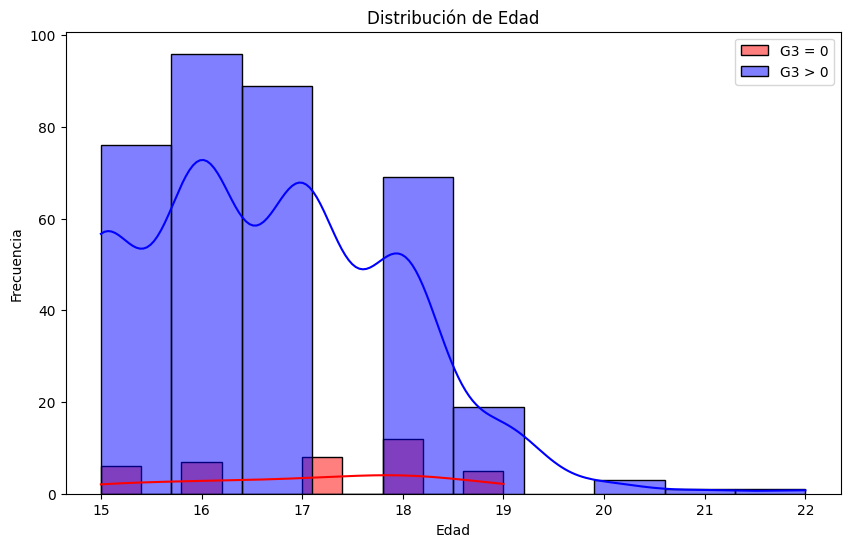

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(final_grade_0['age'], kde=True, color='red', label='G3 = 0', bins=10)
sns.histplot(final_grade_non_0['age'], kde=True, color='blue', label='G3 > 0', bins=10)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

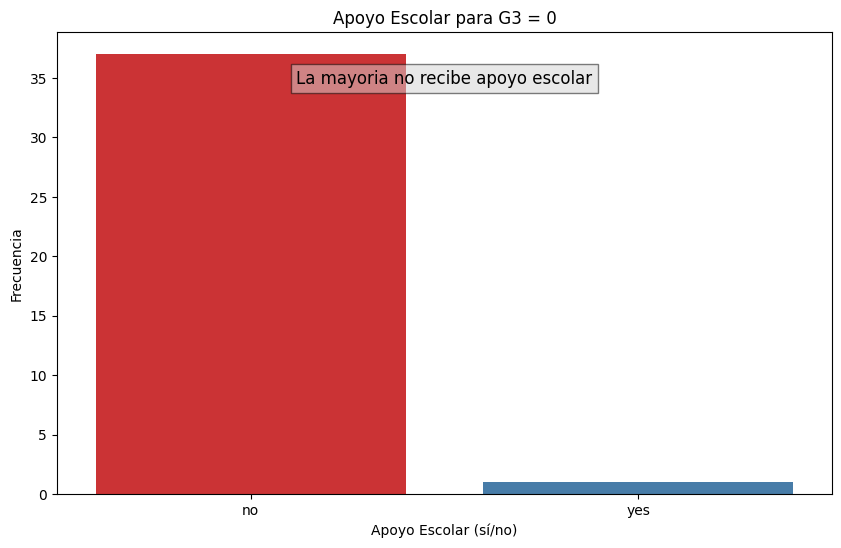

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=final_grade_0, x='schoolsup', palette='Set1',hue='schoolsup',legend=False)
plt.title('Apoyo Escolar para G3 = 0')
plt.xlabel('Apoyo Escolar (sí/no)')
plt.ylabel('Frecuencia')
# Agregar comentario al gráfico
plt.text(0.5, 0.9, 'La mayoria no recibe apoyo escolar', ha='center', va='center', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))
plt.show()


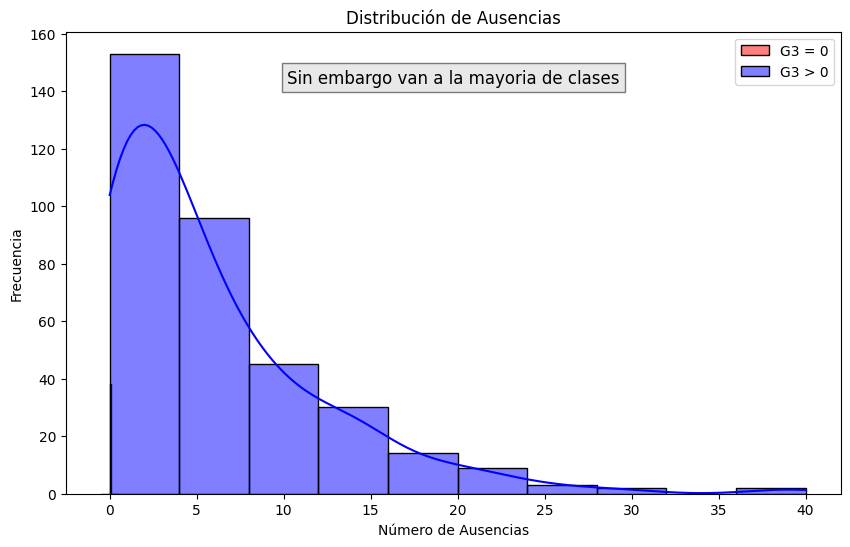

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(final_grade_0['absences'], kde=True, color='red', label='G3 = 0', bins=10)
sns.histplot(final_grade_non_0['absences'], kde=True, color='blue', label='G3 > 0', bins=10)
plt.title('Distribución de Ausencias')
plt.xlabel('Número de Ausencias')
plt.ylabel('Frecuencia')
plt.legend()
plt.text(0.5, 0.9, 'Sin embargo van a la mayoria de clases', ha='center', va='center', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))
plt.show()


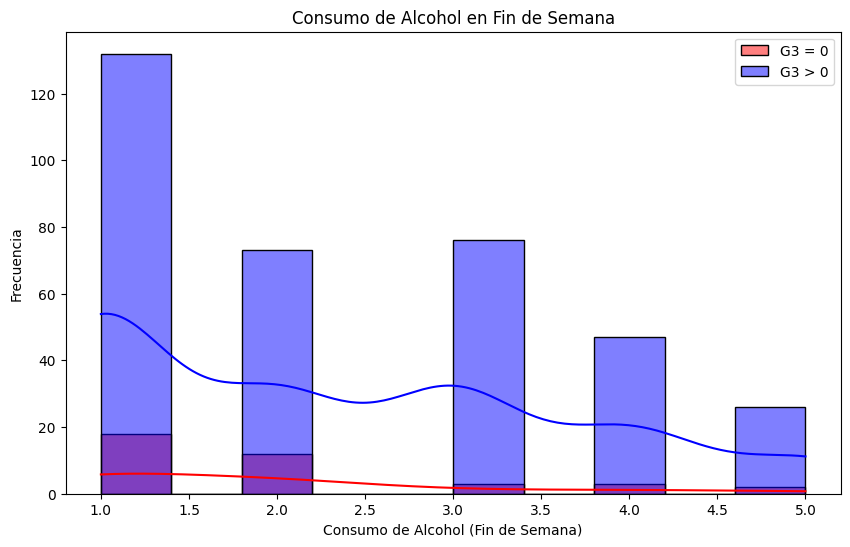

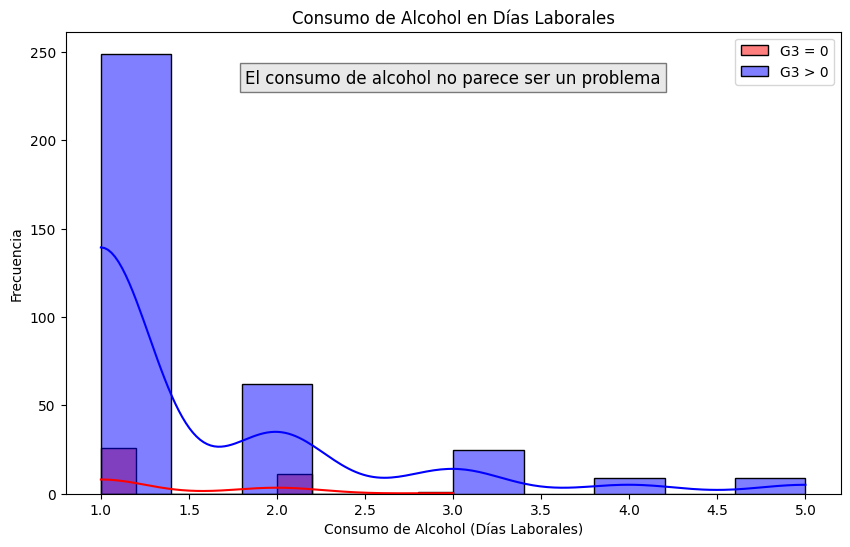

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(final_grade_0['Walc'], kde=True, color='red', label='G3 = 0', bins=10)
sns.histplot(final_grade_non_0['Walc'], kde=True, color='blue', label='G3 > 0', bins=10)
plt.title('Consumo de Alcohol en Fin de Semana')
plt.xlabel('Consumo de Alcohol (Fin de Semana)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(final_grade_0['Dalc'], kde=True, color='red', label='G3 = 0', bins=10)
sns.histplot(final_grade_non_0['Dalc'], kde=True, color='blue', label='G3 > 0', bins=10)
plt.title('Consumo de Alcohol en Días Laborales')
plt.xlabel('Consumo de Alcohol (Días Laborales)')
plt.ylabel('Frecuencia')
plt.legend()
plt.text(0.5, 0.9, 'El consumo de alcohol no parece ser un problema', ha='center', va='center', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))
plt.show()


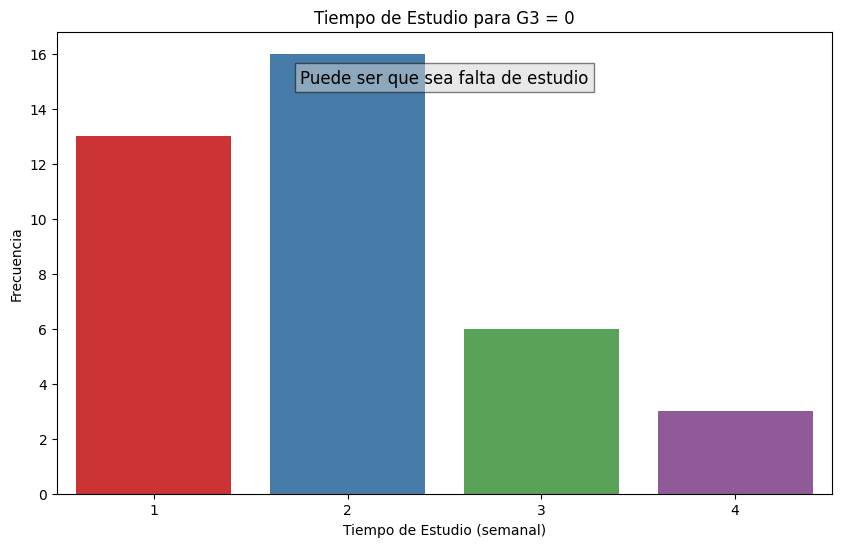

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=final_grade_0, x='studytime', palette='Set1',hue='studytime',legend=False)
plt.title('Tiempo de Estudio para G3 = 0')
plt.xlabel('Tiempo de Estudio (semanal)')
plt.ylabel('Frecuencia')
plt.text(0.5, 0.9, 'Puede ser que sea falta de estudio', ha='center', va='center', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))
plt.show()



In [20]:
# Selección de características relevantes basadas en la matriz de correlación
relevant_features = correlation_matrix['G3'].sort_values(ascending=False)
print("Características más relevantes en relación con la calificación final:")
print(relevant_features)

Características más relevantes en relación con la calificación final:
G3            1.000000
Medu          0.217714
Fedu          0.152724
studytime     0.097792
absences      0.060744
famrel        0.053094
freetime      0.009367
Walc         -0.052646
Dalc         -0.054584
health       -0.063795
traveltime   -0.117450
goout        -0.135074
age          -0.160645
failures     -0.361689
Name: G3, dtype: float64


<small>
Parece importar los estudios de ambos padres. El tiempo de estudio sera tenido en cuenta.
Las ausencias no las voy a considerar debido a que hay varios alumnos por encima del 15% en faltas y no influye en su nota.
age y failures seran tenidos en cuenta por matriz de correlacion negativam donde influyen de manera proporcional inversa
Ire probando para analizar distintos resultados
</small>

## Caracteristicas elegidas para primera prueba de Modelo ML

In [22]:

df.drop(['school', 'famsize','Mjob','Fjob','reason','traveltime','activities','nursery','romantic','freetime','goout','Dalc','Walc','health'], axis=1, inplace=True)
df.head()

,sex,age,address,Pstatus,Medu,Fedu,guardian,studytime,failures,schoolsup,famsup,paid,higher,internet,famrel,absences,G3
0,F,18,U,A,4,4,mother,2,0,yes,no,no,yes,no,4,6,6
1,F,17,U,T,1,1,father,2,0,no,yes,no,yes,yes,5,4,6
2,F,15,U,T,1,1,mother,2,3,yes,no,yes,yes,yes,4,10,10
3,F,15,U,T,4,2,mother,3,0,no,yes,yes,yes,yes,3,2,15
4,F,16,U,T,3,3,father,2,0,no,yes,yes,yes,no,4,4,10


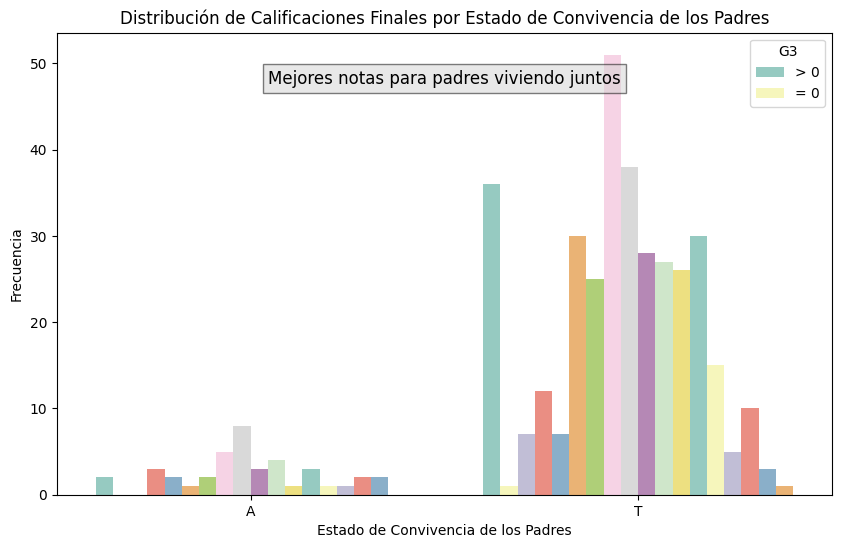

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pstatus', hue='G3', palette='Set3')
plt.title('Distribución de Calificaciones Finales por Estado de Convivencia de los Padres')
plt.xlabel('Estado de Convivencia de los Padres')
plt.ylabel('Frecuencia')
plt.legend(title='G3', loc='upper right', labels=['> 0', '= 0'])
plt.text(0.5, 0.9, 'Mejores notas para padres viviendo juntos', ha='center', va='center', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))
plt.show()


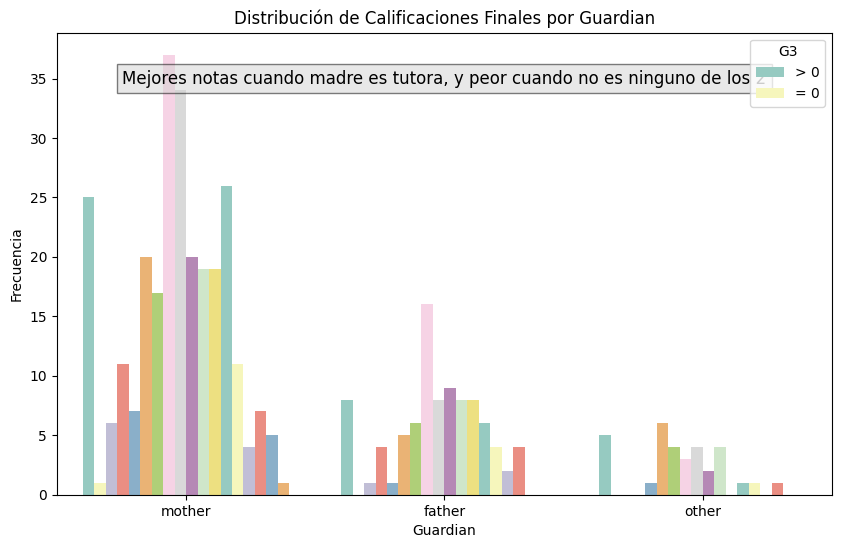

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='guardian', hue='G3', palette='Set3')
plt.title('Distribución de Calificaciones Finales por Guardian')
plt.xlabel('Guardian')
plt.ylabel('Frecuencia')
plt.legend(title='G3', loc='upper right', labels=['> 0', '= 0'])
plt.text(0.5, 0.9, 'Mejores notas cuando madre es tutora, y peor cuando no es ninguno de los 2', ha='center', va='center', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))
plt.show()


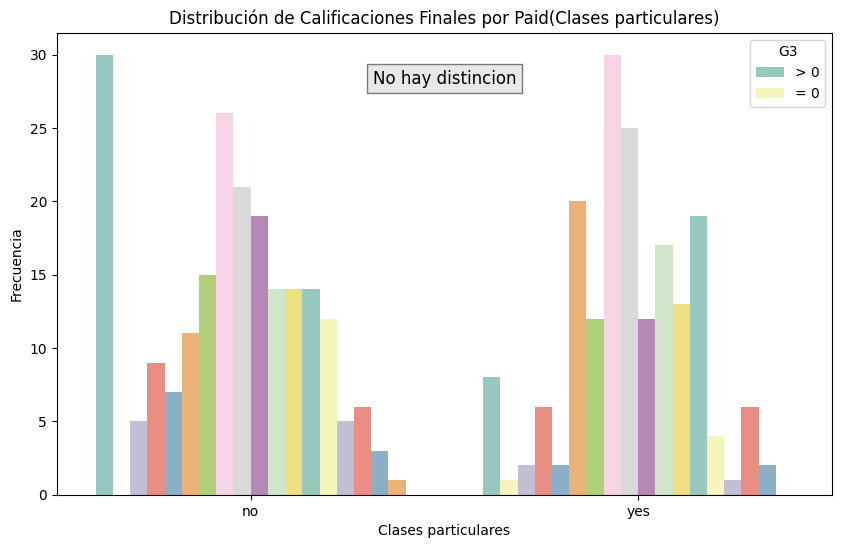

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='paid', hue='G3', palette='Set3')
plt.title('Distribución de Calificaciones Finales por Paid(Clases particulares)')
plt.xlabel('Clases particulares')
plt.ylabel('Frecuencia')
plt.legend(title='G3', loc='upper right', labels=['> 0', '= 0'])
plt.text(0.5, 0.9, 'No hay distincion', ha='center', va='center', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))
plt.show()


In [32]:
#Exportar para usar en el Modelo
df.to_csv('Data_EDA.csv', index=False)